# Walkthrough: Kernel Ridge Regression

I would like to walk through the Kernel Ridge Regression (KRR) Algorithm.

In [68]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge

from scipy.spatial.distance import pdist 
from scipy import linalg

rng = np.random.RandomState(0)

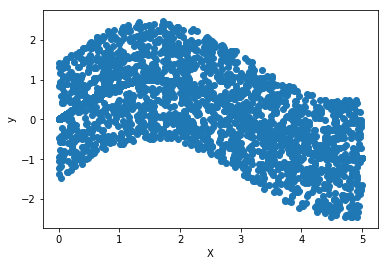

In [69]:
# Import some data



# Make some regression data
X, y = make_regression(n_samples=100, n_features=1, n_targets=1)

X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0]//5))

# show the data
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

In [70]:
# split into training and testing data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=.6)

# get a sigma heuristic
sigma = np.median(pdist(Xtrain))

# compute the kernel matrices
Kernel = {}
Kernel['full'] = rbf_kernel(X, Xtrain, sigma)
Kernel['train'] = rbf_kernel(Xtrain, Xtrain, sigma)
Kernel['test'] = rbf_kernel(Xtest, Xtrain, sigma)

# size sanity check
print(np.shape(Kernel['full']), np.shape(Kernel['train']),np.shape(Kernel['test']))

# KRR algorithm
gamma = 1e-5
alpha = linalg.solve(Kernel['train']+gamma*np.eye(Kernel['train'].shape[0]),ytrain)

# predict using the test data
ypred = np.dot(Kernel['test'], alpha)

# perform assessment
score = mean_squared_error(ytest, ypred)
print('Score:{s}'.format(s=score))

# predict on all data
ynew = np.dot(Kernel['full'], alpha)

(10000, 6000) (6000, 6000) (4000, 6000)
Score:0.15342590923622765


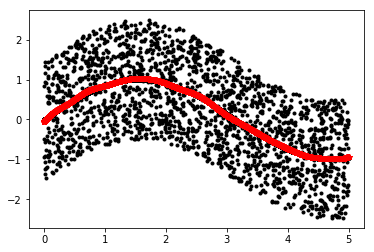

In [71]:
# plot all values
plt.plot(X, y, 'k.')
plt.plot(X, ynew, 'r*')
plt.show()

In [75]:
kernel = 'rbf'
krr = KernelRidge(kernel=kernel)
krr.fit(Xtrain, ytrain)
ypred = krr.predict(Xtest)


<bound method RegressorMixin.score of KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='rbf',
      kernel_params=None)>


In [77]:
print(krr.score(Xtest, ytest))

0.762361714051
